In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random, json

from curriculum_graph import build_curriculum
from simulate_students import generate_students
from curriculum_env import CurriculumEnv

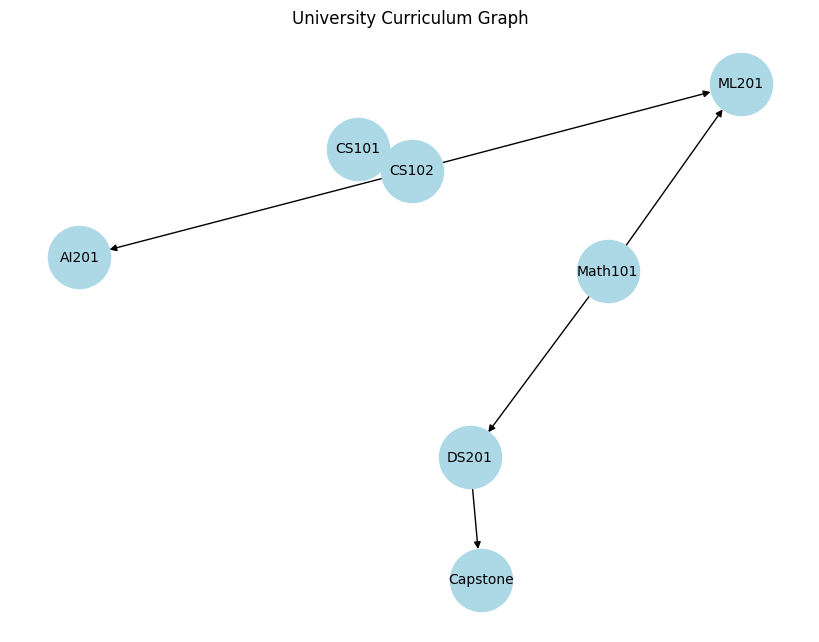

In [47]:
G = build_curriculum()
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', font_size=10)
plt.title("University Curriculum Graph")
plt.show()

In [48]:
students = generate_students()
student = students[3]
print("Student ID:", student["student_id"])
print("Interest:", student["interest"])
print("Completed Courses:", student["completed_courses"])
print("GPA:", student["GPA"])


Student ID: 3
Interest: Data Science
Completed Courses: ['Math101', 'CS102', 'DS201']
GPA: 3.45


In [49]:
env = CurriculumEnv(student, G)
env.reset()

logs = []
total_reward = 0

for term in range(6):
    eligible = env.get_eligible_courses()
    print(f"\n Term {term+1} - Eligible Courses:", eligible)

    if not eligible:
        break

    selected = random.sample(eligible, min(3, len(eligible)))
    print(f" Selected: {selected}")

    _, reward, done = env.step(selected)
    total_reward += reward

    logs.append({
        "term": term + 1,
        "selected_courses": selected,
        "GPA": student["GPA"],
        "reward": reward
    })

    if done:
        print("Graduation condition met!")
        break



 Term 1 - Eligible Courses: ['CS101', 'AI201', 'ML201', 'Capstone']
 Selected: ['Capstone', 'AI201', 'CS101']
Graduation condition met!


In [50]:
pd.DataFrame(logs)

,term,selected_courses,GPA,reward
0,1,"[Capstone, AI201, CS101]",3.53,3.341601


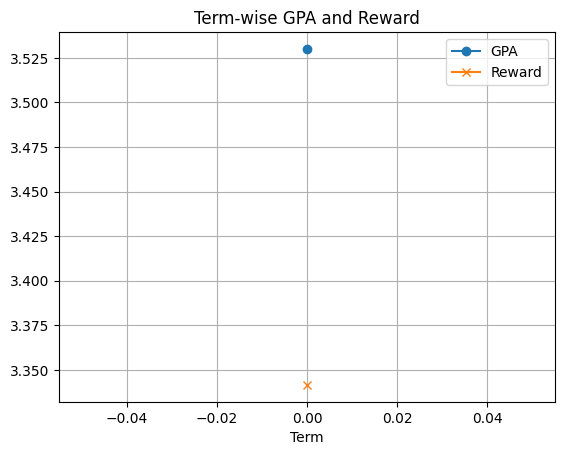

In [51]:
gpa_values = [log["GPA"] for log in logs]
rewards = [log["reward"] for log in logs]

plt.plot(gpa_values, marker='o', label='GPA')
plt.plot(rewards, marker='x', label='Reward')
plt.title("Term-wise GPA and Reward")
plt.xlabel("Term")
plt.legend()
plt.grid()
plt.show()


In [52]:
df = pd.read_csv("results/student_results.csv")

sample = df.sample(5)

sample

,student_id,interest,final_GPA,total_courses,graduated,total_reward
37,37,AI,3.26,7,True,4.10
87,87,AI,3.24,7,True,6.62
6,6,Security,2.95,7,True,2.73
9,9,Security,3.13,7,True,4.44
14,14,Data Science,3.26,7,True,5.32
